In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def V(x,y,z, a=1.0, V_0=1.0, n_max=10, m_max=10):
    """ Function to calculate the potential for a cube with two sides (in the x direction) at potential V_0
            x,y,z -- coordinates to evaluate (can be arrays)
            a -- side length
            V_0 -- potential on faces at x = +/- a/2
            n_max, m_max -- max terms to sum the series over in y and z directions

        returns an array of the size of x,y,z
    """

    prefac = 16*V_0/np.pi**2
    Vout = np.zeros_like(x)
    for n in range(1,n_max,2): ## sum over odd integers from 1 to n_max
        for m in range(1,m_max,2): ## sum over odd integers from 1 to m_max
            smn = np.sqrt(n**2 + m**2)
            Vout += 1/(n*m) * np.sin(n*np.pi*(y + a/2)) * np.sin(m*np.pi*(z + a/2)) * np.cosh(np.pi*smn*x/a) / np.sinh(np.pi*smn/2)
    
    return prefac*Vout

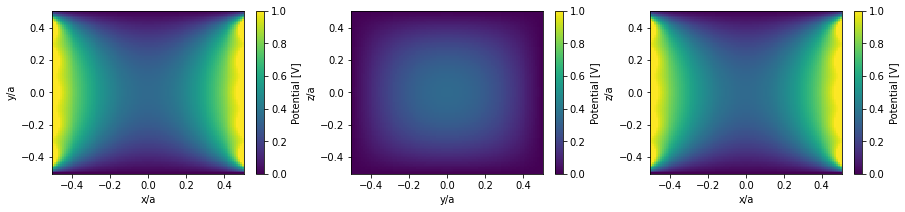

In [28]:
## make a plot of the potential in xy plane

x = np.linspace(-0.5,0.5,100)
y = np.linspace(-0.5,0.5,100)

xg, yg = np.meshgrid(x, y)
zs = np.zeros_like(xg)

Vxy = V(xg,yg,zs)
Vyz = V(zs,xg,yg)
Vxz = V(xg,zs,yg)

plt.figure(figsize=(15,3))

pot_vec = [Vxy, Vyz, Vxz]
xlab_vec = ["x/a","y/a","x/a"]
ylab_vec = ["y/a","z/a","z/a"]
title_vec = ["X/Y plane", "Y/Z plane", "X/Z plane"]

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.pcolormesh(xg,yg,pot_vec[i])
    plt.xlabel(xlab_vec[i])
    plt.ylabel(ylab_vec[i])
    plt.colorbar(label="Potential [V]")
    plt.clim(0,1)

plt.subplots_adjust(wspace=0.25)